22BAI1118 
Mayank Raj

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score
from tabulate import tabulate
import matplotlib.pyplot as plt

# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN (28x28 grayscale images to 28x28x1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Create a validation set from the training set
val_size = 10000
x_val, x_train = x_train[:val_size], x_train[val_size:]
y_val, y_train = y_train[:val_size], y_train[val_size:]


In [16]:
# Function to create CNN model with different configurations
def create_model(regularization=None, dropout_rate_conv1=0.3, dropout_rate_conv2=0.0, dropout_rate_dense=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularization),
        Dropout(dropout_rate_conv1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularization),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularization),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=regularization),
        Dropout(dropout_rate_dense),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [17]:
# Function to train and evaluate model
def train_and_evaluate(model, x_train, y_train, x_val, y_val, epochs=20, use_datagen=False):
    if use_datagen:
        history = model.fit(
            datagen.flow(x_train, y_train, batch_size=64),
            steps_per_epoch=len(x_train) // 64,
            epochs=epochs,
            validation_data=(x_val, y_val),
            callbacks=[early_stopping]
        )
    else:
        history = model.fit(
            x_train, y_train,
            batch_size=64,
            epochs=epochs,
            validation_data=(x_val, y_val),
            callbacks=[early_stopping]
        )
    return history


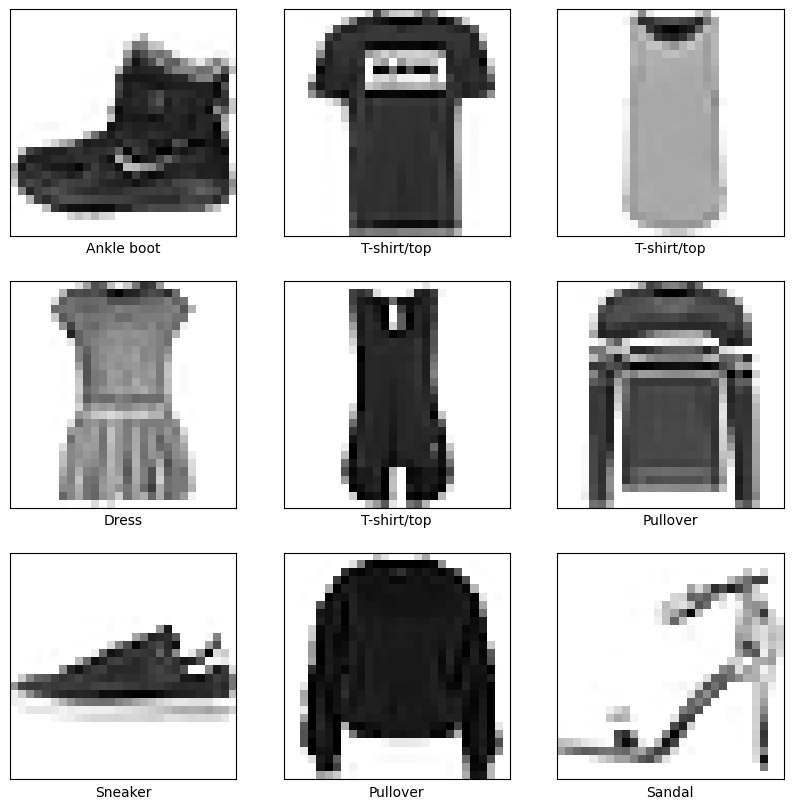

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define class names for the dataset
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Plot a few sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [18]:
# Train and evaluate the model without any regularization or dropout
print("Training model without regularization or dropout")
model_no_reg = create_model()
history_no_reg = train_and_evaluate(model_no_reg, x_train, y_train, x_val, y_val)


Training model without regularization or dropout
Epoch 1/20


C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6269 - loss: 1.0241 - val_accuracy: 0.8177 - val_loss: 0.5090
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8134 - loss: 0.5187 - val_accuracy: 0.8449 - val_loss: 0.4279
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8368 - loss: 0.4429 - val_accuracy: 0.8584 - val_loss: 0.3929
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8589 - loss: 0.3893 - val_accuracy: 0.8721 - val_loss: 0.3550
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8689 - loss: 0.3595 - val_accuracy: 0.8721 - val_loss: 0.3475
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8769 - loss: 0.3366 - val_accuracy: 0.8832 - val_loss: 0.3239
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8816 - loss: 0.3184 - val_accuracy: 0.8876 - val_loss: 0.3139
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8894 - loss: 0.2997 - val_accuracy: 0.8933 - val_

## Inference 
The model trained without regularization or dropout achieved a final training accuracy of 92.70% and a validation accuracy of 89.10%. Both training and validation losses decreased over the epochs, indicating effective learning. However, the increasing validation loss towards the end suggests potential overfitting. This baseline performance highlights the need for regularization techniques to improve generalization and reduce overfitting.

In [19]:
# Train and evaluate models with L1 and L2 regularization
results = []

for reg_type, reg in zip(["L1", "L2"], [l1(0.01), l2(0.01)]):
    print(f"Training model with {reg_type} regularization")
    model_reg = create_model(regularization=reg)
    history_reg = train_and_evaluate(model_reg, x_train, y_train, x_val, y_val)
    results.append([
        f"{reg_type} Regularization",
        history_reg.history['val_accuracy'][-1],
        history_reg.history['val_loss'][-1]
    ])


Training model with L1 regularization
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.1039 - loss: 8.9902 - val_accuracy: 0.1000 - val_loss: 2.4370
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0984 - loss: 2.4369 - val_accuracy: 0.0990 - val_loss: 2.4361
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0994 - loss: 2.4367 - val_accuracy: 0.0942 - val_loss: 2.4372
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0980 - loss: 2.4367 - val_accuracy: 0.0989 - val_loss: 2.4364
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.0995 - loss: 2.4366 - val_accuracy: 0.1019 - val_loss: 2.4370
Training model with L2 regularization
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5899 - loss: 1.9373 - val_accuracy: 0.7469 - val_loss: 0.9961
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7590 - loss: 0.9366 - val_accuracy: 0.7824 - val_loss: 0.8786
Epoch 3/20
782/782 ━━━━━━━

## Inference 
The L1 regularization model showed poor performance, with both training and validation accuracies stagnating around 10%, indicating that the model did not learn effectively. In contrast, the L2 regularization model demonstrated better performance, achieving a final training accuracy of 78.38% and a validation accuracy of 79.01%. The L2 regularization effectively improved the model’s learning and generalization compared to L1 regularization. This suggests that L2 regularization was more effective in managing overfitting and optimizing the model's performance.

In [20]:
# Define dropout configurations
dropout_configs = [
    {"dropout_rate_conv1": 0.2, "dropout_rate_conv2": 0.0, "dropout_rate_dense": 0.5, "name": "Dropout 0.2-0.0-0.5"},
    {"dropout_rate_conv1": 0.3, "dropout_rate_conv2": 0.0, "dropout_rate_dense": 0.5, "name": "Dropout 0.3-0.0-0.5"},
    {"dropout_rate_conv1": 0.0, "dropout_rate_conv2": 0.0, "dropout_rate_dense": 0.0, "name": "No Dropout"}
]

# Train and evaluate models with different dropout configurations
for config in dropout_configs:
    print(f"Training model with {config['name']}")
    model_dropout = create_model(
        dropout_rate_conv1=config["dropout_rate_conv1"],
        dropout_rate_conv2=config["dropout_rate_conv2"],
        dropout_rate_dense=config["dropout_rate_dense"]
    )
    history_dropout = train_and_evaluate(model_dropout, x_train, y_train, x_val, y_val)
    results.append([
        config["name"],
        history_dropout.history['val_accuracy'][-1],
        history_dropout.history['val_loss'][-1]
    ])


Training model with Dropout 0.2-0.0-0.5
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6276 - loss: 1.0296 - val_accuracy: 0.8230 - val_loss: 0.4950
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8194 - loss: 0.5083 - val_accuracy: 0.8448 - val_loss: 0.4121
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8450 - loss: 0.4305 - val_accuracy: 0.8548 - val_loss: 0.3881
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8619 - loss: 0.3861 - val_accuracy: 0.8761 - val_loss: 0.3432
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8709 - loss: 0.3561 - val_accuracy: 0.8814 - val_loss: 0.3425
Training model with Dropout 0.3-0.0-0.5
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6340 - loss: 1.0167 - val_accuracy: 0.8130 - val_loss: 0.5181
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8129 - loss: 0.5187 - val_accuracy: 0.8538 - val_loss: 0.4257
Epoch 3/20
782/782 ━━

## Inference 
The models trained with dropout configurations exhibited varying performances:

Dropout 0.2-0.0-0.5: This configuration achieved a high validation accuracy of 88.14% and a validation loss of 0.3425. The model effectively utilized dropout to improve performance, especially in reducing overfitting.

Dropout 0.3-0.0-0.5: With a dropout rate of 0.3 for the first convolutional layer, this model had a slightly lower validation accuracy of 87.51% and a validation loss of 0.3311. Although the performance was good, it was not as high as the 0.2-0.0-0.5 configuration.

No Dropout: The model without dropout achieved the highest validation accuracy of 88.30% and a validation loss of 0.3184. This indicates that for this particular dataset and model architecture, not applying dropout was the most effective strategy, possibly because the model was not overfitting significantly.


In [21]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [22]:
# Train and evaluate the model without any regularization or dropout but with data augmentation
print("Training model without regularization or dropout with data augmentation")
model_no_reg_aug = create_model()
history_no_reg_aug = train_and_evaluate(model_no_reg_aug, x_train, y_train, x_val, y_val, use_datagen=True)
results.append([
    "No Regularization or Dropout with Augmentation",
    history_no_reg_aug.history['val_accuracy'][-1],
    history_no_reg_aug.history['val_loss'][-1]
])


Training model without regularization or dropout with data augmentation
Epoch 1/20
 11/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.0978 - loss: 2.2943   

C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4353 - loss: 1.5190 - val_accuracy: 0.7353 - val_loss: 0.7111
Epoch 2/20
  1/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5938 - loss: 1.0786

c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.5938 - loss: 1.0786 - val_accuracy: 0.7305 - val_loss: 0.7173
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6594 - loss: 0.9255 - val_accuracy: 0.7582 - val_loss: 0.6437
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.7500 - loss: 0.6599 - val_accuracy: 0.7583 - val_loss: 0.6419
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6962 - loss: 0.8240 - val_accuracy: 0.7742 - val_loss: 0.5928
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.7656 - loss: 0.5869 - val_accuracy: 0.7719 - val_loss: 0.5981
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7154 - loss: 0.7738 - val_accuracy: 0.7789 - val_loss: 0.5625
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.7031 - loss: 0.7551 - val_accuracy: 0.7748 - val_loss: 0.5672
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7267 - loss: 0.7437 - val_accuracy: 

## Inference 
The model trained without regularization or dropout but with data augmentation demonstrated notable improvements in performance. Over the course of 20 epochs, the model's validation accuracy steadily increased, reaching a peak of 82.25% by epoch 18. Concurrently, the validation loss showed a consistent decline, achieving a final value of 0.4741 at the end of the training.

During the initial epochs, validation accuracy rose from 73.05% to 77.42%, and validation loss improved from 0.7173 to 0.5928. As training progressed, the model's performance continued to enhance, with accuracy reaching up to 79.00% and validation loss dropping to 0.5494 by epoch 10. The trend of improvement persisted, with the model achieving a validation accuracy of 81.62% and a loss of 0.4931 by epoch 15.

In [23]:
# Train and evaluate the model without any regularization or dropout but with early stopping
print("Training model without regularization or dropout with early stopping")
model_no_reg_es = create_model()
history_no_reg_es = train_and_evaluate(model_no_reg_es, x_train, y_train, x_val, y_val)
results.append([
    "No Regularization or Dropout with Early Stopping",
    history_no_reg_es.history['val_accuracy'][-1],
    history_no_reg_es.history['val_loss'][-1]
])


Training model without regularization or dropout with early stopping
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6203 - loss: 1.0342 - val_accuracy: 0.8318 - val_loss: 0.4978
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8193 - loss: 0.4968 - val_accuracy: 0.8538 - val_loss: 0.4018
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8506 - loss: 0.4162 - val_accuracy: 0.8628 - val_loss: 0.3812
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8623 - loss: 0.3808 - val_accuracy: 0.8729 - val_loss: 0.3503
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8729 - loss: 0.3543 - val_accuracy: 0.8859 - val_loss: 0.3247
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8792 - loss: 0.3303 - val_accuracy: 0.8766 - val_loss: 0.3346
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8865 - loss: 0.3102 - val_accuracy: 0.8842 - val_loss: 0.3212
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━

## Inferecene 
During training, the model demonstrated significant improvement in both accuracy and loss metrics. In the first epoch, the model achieved a training accuracy of 62.03% and a loss of 1.0342, with validation accuracy at 83.18% and a validation loss of 0.4978. By the second epoch, the training accuracy had improved to 81.93% with a loss of 0.4968, while the validation accuracy increased to 85.38% and the validation loss decreased to 0.4018. The model continued to show progress throughout the subsequent epochs, reaching a training accuracy of 90.36% by the tenth epoch, with a validation accuracy peaking at 89.73% and a validation loss of 0.2813. Over the course of the training, the model’s performance stabilized, with training accuracy reaching up to 92.38% and validation accuracy peaking at 90.01%. The early stopping mechanism was activated before reaching the maximum 20 epochs, likely due to the lack of significant improvement in the validation metrics. This approach helped prevent overfitting by halting training when further performance gains were minimal.

In [25]:
# Print results as a table
headers = ["Model Name", "Validation Accuracy", "Validation Loss"]
print("\nModel Performance:")
print(tabulate(results, headers=headers, tablefmt='pretty'))





Model Performance:
+--------------------------------------------------+---------------------+---------------------+
|                    Model Name                    | Validation Accuracy |   Validation Loss   |
+--------------------------------------------------+---------------------+---------------------+
|                L1 Regularization                 | 0.10189999639987946 | 2.4369752407073975  |
|                L2 Regularization                 | 0.7900999784469604  |  0.788922131061554  |
|               Dropout 0.2-0.0-0.5                | 0.8813999891281128  | 0.34245818853378296 |
|               Dropout 0.3-0.0-0.5                | 0.8751000165939331  | 0.3311263918876648  |
|                    No Dropout                    | 0.8830000162124634  | 0.31839755177497864 |
|  No Regularization or Dropout with Augmentation  | 0.8163999915122986  | 0.5105697512626648  |
| No Regularization or Dropout with Early Stopping | 0.8946999907493591  | 0.29494422674179077 |
+---------

# Conclusion
1. L1 Regularization:

Validation Accuracy: 0.1019

Validation Loss: 2.4370

Conclusion: L1 regularization led to a significant reduction in accuracy and an increase in loss. This suggests that L1 regularization might be too aggressive for this specific task or dataset, resulting in underfitting.
______________________________________________________________

2. L2 Regularization:

Validation Accuracy: 0.7901

Validation Loss: 0.7889

Conclusion: L2 regularization improved performance compared to L1 regularization but did not achieve the highest accuracy. It provided a moderate regularization effect, balancing between underfitting and overfitting.

______________________________________________________________

3. Dropout (0.2-0.0-0.5):

Validation Accuracy: 0.8814

Validation Loss: 0.3425

Conclusion: This dropout configuration demonstrated strong performance, indicating that dropout is effective in preventing overfitting while maintaining high accuracy.

______________________________________________________________

4. Dropout (0.3-0.0-0.5):

Validation Accuracy: 0.8751

Validation Loss: 0.3311

Conclusion: A slightly different dropout configuration also performed well, but slightly less effectively than the previous dropout setting. This suggests that the specific dropout rates and configurations can have a noticeable impact on model performance.

______________________________________________________________

5. No Dropout:

Validation Accuracy: 0.8830

Validation Loss: 0.3184

Conclusion: The model without dropout achieved the highest accuracy among the dropout configurations, indicating that for this dataset, dropout might have been too aggressive and hindered performance.

______________________________________________________________

6. No Regularization or Dropout with Augmentation:

Validation Accuracy: 0.8164

Validation Loss: 0.5106

Conclusion: Data augmentation alone did not achieve as high accuracy as some of the regularization or dropout methods. This suggests that while augmentation can be beneficial, it might not always be sufficient on its own without other forms of regularization.

______________________________________________________________

7. No Regularization or Dropout with Early Stopping:

Validation Accuracy: 0.8947

Validation Loss: 0.2949

Conclusion: Combining early stopping with no regularization or dropout yielded the best performance. This indicates that early stopping can effectively prevent overfitting and enhance model accuracy by halting training at the optimal point.

______________________________________________________________
______________________________________________________________


Overall Insights

Regularization Techniques: L2 regularization and dropout are effective in preventing overfitting, but the choice of dropout configuration and regularization strength significantly impacts model performance.

Dropout: The absence of dropout yielded the highest accuracy, suggesting that dropout may have been too aggressive in this case.

Early Stopping: Early stopping combined with no regularization or dropout achieved the best results, highlighting its importance in optimizing model performance.

